## 다중 회귀

* 여러 개의 특성을 사용한 선형 회귀
* 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선이지만 2개의 특성을 사용하면 평면을 학습함.
* 타깃 = a * 특성1 + b * 특성 2 + 절편

## 특성 공학

* 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성 공학이라고 함.

In [2]:
# 데이터 준비 (길이, 높이, 두께)

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

**변환기: 특성을 만들거나 전처리하기 위한 사이킷런의 클래스**

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


* 2와 3을 각기 제곱한 4와 9가 추가되었고, 2와 3을 곱한 6이 추가되었다.
* 무게 = a * 길이 + b * 높이 + c * 두께 + d * 1
* 1이 추가된 이유: 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다.
* 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1)이 되지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요는 없음
* 따라서 include_bias = False로 지정하여 다시 특성을 변환

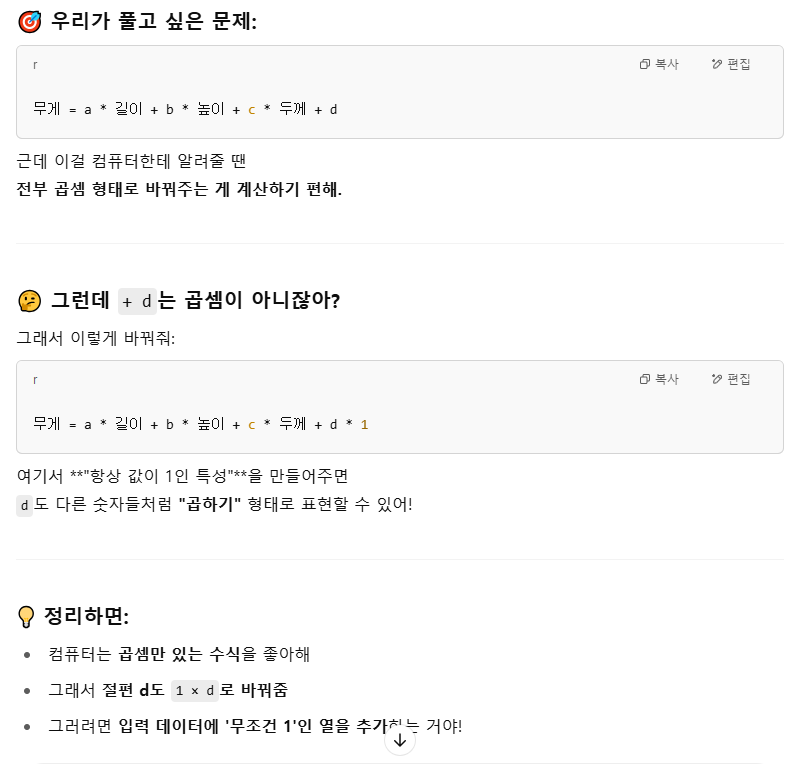

In [7]:
# 특성 변환하여 1 없애기

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


절편을 위한 항이 제거되고 특성의 제곱과 특성끼리 곱한 항만 추가됨

In [8]:
# train_input 에 적용해보자

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [9]:
# 9개의 특성이 어떠한 조합으로 만들어졌는지 확인해보자
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [10]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

* 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다.
* 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것뿐이다.

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


특성이 늘어나면 선형 회귀의 능력을 매우 강하다는 것을 알 수 있다.

In [12]:
print(lr.score(test_poly, test_target))

0.9714559911594175


In [13]:
# 특성을 더 많이 추가하기

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


특성의 개수가 무려 55개나 된다.

In [14]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999912403


In [15]:
print(lr.score(test_poly, test_target))

-144.40786116060949


* 특성의 개수를 크게 늘리면 선형 모델은 아주 강력해진다. 
* 훈련 세트에 대해 거의 완벽하게 학습할 수 있지만, 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 받는다

## 규제
* 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
* 즉, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
* 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일
* 선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다. 
* 릿지(ridge): 계수를 제곱한 값을 기준으로 규제를 적용
(일반적으로 더 선호하는 알고리즘)
* 라쏘(lasso): 계수의 절대값을 기준으로 규제를 적용

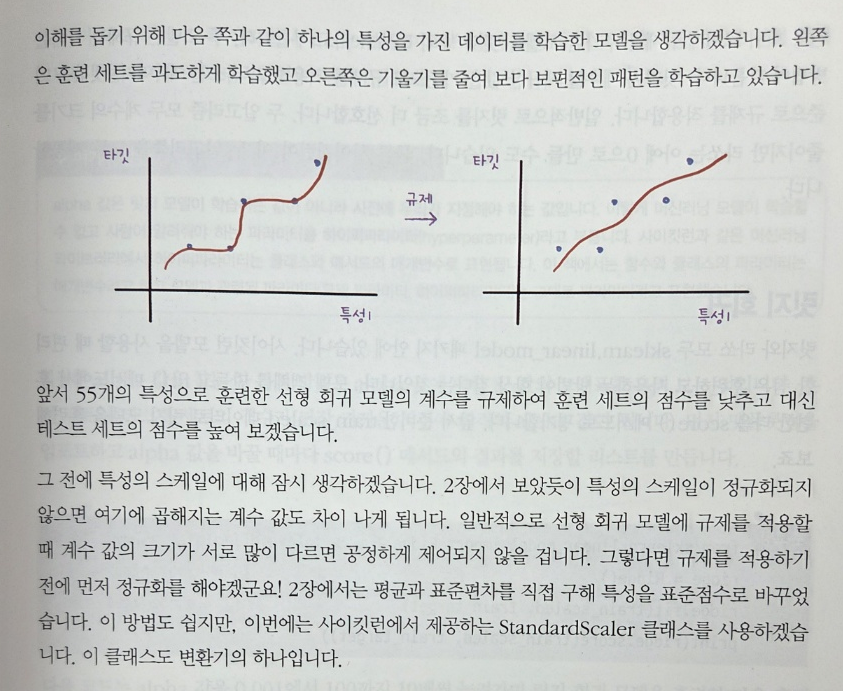

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀
* 기존 모델과 같이, 모델 객체를 만들고 fit() 메서드에서 훈련한 다음 score() 메서드로 평가한다.

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [18]:
print(ridge.score(test_scaled, test_target))

0.9790693977615383


테스트 점수가 정상으로 돌아왔음. 많은 특성을 사용했음에도 불구하고 훈련세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있음

### alpha 매개변수
* 릿지와 라쏘 모델을 사용할 때 alpha 매개변수로 규제의 강도를 조절할 수 있다.
* alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
* alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀모델과 유사해지므로 과대적합될 가능성이 크다.
* **alpha 값은 릿지 모델이 학습하는 값이 아니라 사람이 직접 알려줘야 하는 '하이퍼파라미터'이다.**
* 적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 $R^2$값의 그래프를 그려 보는 것이다.
* 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

In [19]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장하기

In [20]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 만들기
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

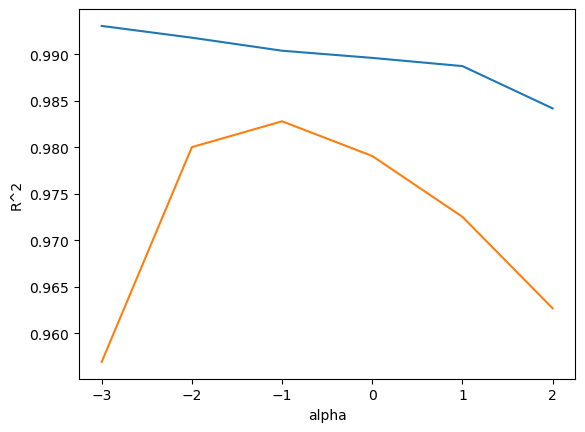

In [21]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 위가 훈련 세트 그래프이고, 아래가 테스트 세트 그래프
* 왼쪽은 과대적합, 오른편은 과소적합 경향
* 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 $10^{-1}$ = 0.1 이다

In [22]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570369
0.982797646538703


## 라쏘 회귀

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [24]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [26]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 만들기
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\Admin\miniforge3\envs\selfstudy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\miniforge3\envs\selfstudy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


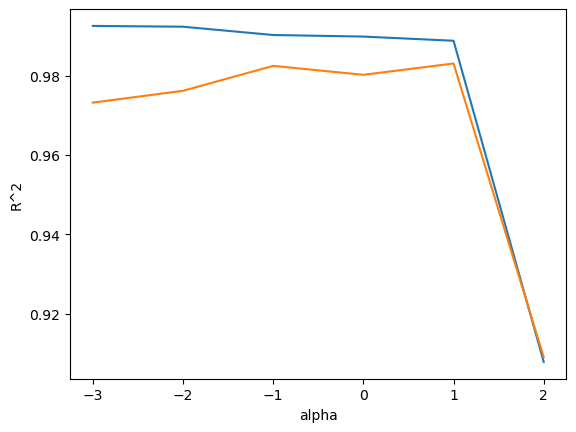

In [27]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 왼쪽은 과대적합, 오른쪽 끝으로 갈수록 과소적합
* 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 1, 즉 $10^1$ = 10 이다

In [28]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘 모델의 계수는 coef_ 속성에 저장되어 있다. 이 중에 0인 것은 헤아려 보자.

In [29]:
print(np.sum(lasso.coef_ == 0))

40


55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개밖에 되지 않는다.